In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC sovrasmorzato.csv'
fr = pd.read_csv(FILE)

In [2]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (Volt)'])
sigmaV = 0.04 / np.sqrt(12)

C = 0.000000099
R = 10000 #ohm 1%
L = 0.082

Vg = 4 #Volt

w2 = 1 / (L*C)
γ = R / (2*L)
β = np.sqrt(γ**2 - w2)

$
V_r = V_0 \cdot e^{-\gamma t} \cdot (\exp(\beta t) - \exp(-\beta t))
$

In [3]:
def VR(t,V0,γ,β):
    return V0 * np.exp(-γ*t) * (np.exp(β*t) - np.exp(-β*t))

In [4]:
i = Interpolazione(t,V,VR,sigmaV,p0=[Vg,γ,β])
print(i)

   
Parameters: [7.95832207e+00 5.29769927e+04 5.19504636e+04] 
Sigma parameters: [2.30340059e-02 6.22432491e+02 6.24393350e+02]

sigmaY: 0.011547005383792516

chiquadro ridotto: 22.55
df: 90
pvalue: 100.0%
covariance matrix: [[ 4.96887499e-04 -8.33428607e+00 -8.40394499e+00]
 [-8.33428607e+00  3.62830369e+05  3.63965679e+05]
 [-8.40394499e+00  3.63965679e+05  3.65120031e+05]]    



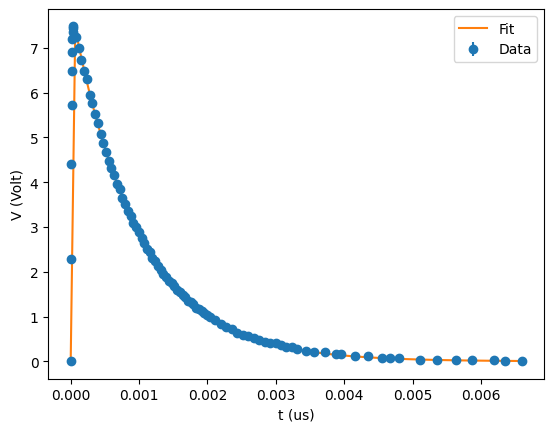

In [5]:
plt.errorbar(t, V, yerr=sigmaV, fmt='o', label='Data')
plt.plot(i.x_best, i.y_best, label='Fit')
plt.xlabel('t (us)')
plt.ylabel('V (Volt)')
plt.legend()
plt.show()
